# 資管四甲、C109118140、林兪丞

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
from sklearn.datasets import load_breast_cancer
wdbc = load_breast_cancer()

X = pd.DataFrame(wdbc.data)  # 將feature轉換成dataFrame
column_names = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst']

X.columns = column_names
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
y = pd.Series(wdbc.target)
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

##  Selecting Top 10 Best Features using SelectKBest class
kc = SelectKBest(score_func=chi2, k=10) 
kf = SelectKBest(score_func=f_classif, k=10)
km = SelectKBest(score_func=mutual_info_classif, k=10)

kc_fit = kc.fit(X,y)
kf_fit = kf.fit(X,y)
km_fit = km.fit(X,y)

kc_scores = pd.DataFrame(kc_fit.scores_)  # Scores of features.
kf_scores = pd.DataFrame(kf_fit.scores_)  # Scores of features.
km_scores = pd.DataFrame(km_fit.scores_)  # Scores of features.
X_columns = pd.DataFrame(X.columns)

# Combine dataframes ...
featureScores = pd.concat([X_columns, kc_scores, kf_scores, km_scores], axis=1)
# Naming the dataframe's columns ...
featureScores.columns = ['Specs', 'chi2_Scores', 'f-test_Scores',
                         'mutual_info_scores']
featureScores

,Specs,chi2_Scores,f-test_Scores,mutual_info_scores
0,radius_mean,266.104917,646.981021,0.368253
1,texture_mean,93.897508,118.096059,0.100801
2,perimeter_mean,2011.102864,697.235272,0.403815
3,area_mean,53991.655924,573.060747,0.357116
4,smoothness_mean,0.149899,83.651123,0.081317
5,compactness_mean,5.403075,313.233079,0.210880
6,concavity_mean,19.712354,533.793126,0.372727
7,points_mean,10.544035,861.676020,0.440533
8,symmetry_mean,0.257380,69.527444,0.069037
9,dimension_mean,0.000074,0.093459,0.006112


<Figure size 1000x2000 with 0 Axes>

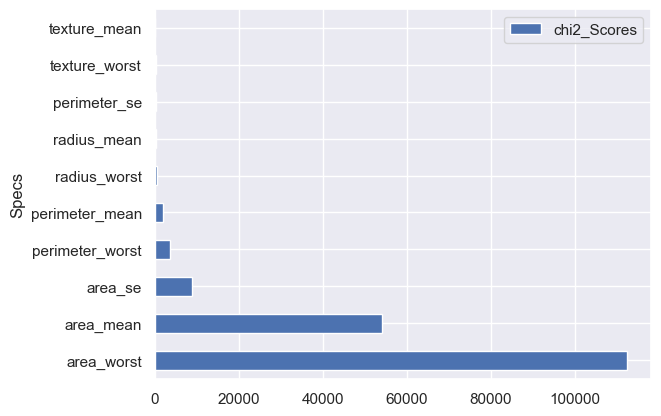

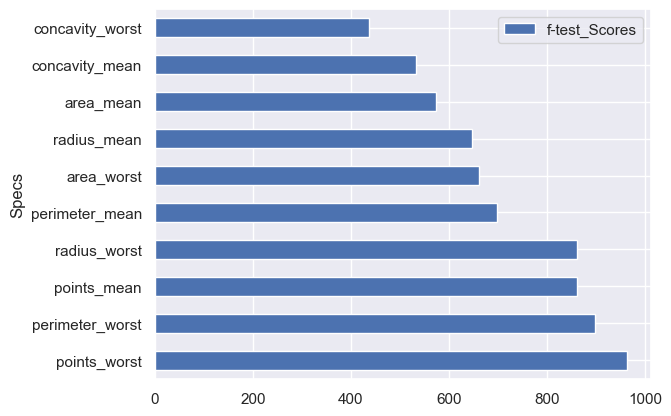

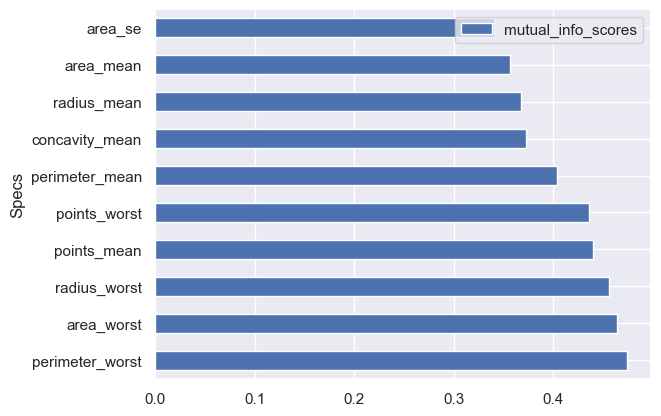

In [8]:
plt.figure(1, figsize=(10, 20))
for i in range(3):
    fs = featureScores.columns[i+1] #第1、2、3欄
    best_features = featureScores.nlargest(10, fs)[['Specs', fs]] 
    best_features.plot.barh('Specs');   # pands plot()

DecisionTree > feature importances : 
 [0.00563858 0.         0.         0.         0.00701689 0.
 0.00877112 0.         0.         0.         0.007316   0.
 0.         0.00204521 0.00744793 0.03873296 0.         0.
 0.         0.         0.69559352 0.08856128 0.         0.0110859
 0.01302656 0.         0.00183582 0.11292823 0.         0.        ]


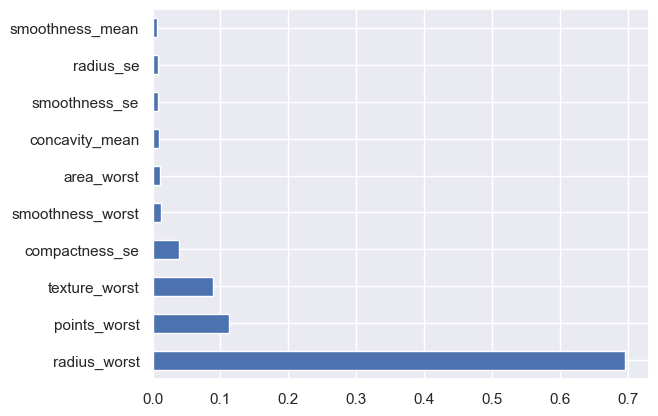

RandomForest > feature importances : 
 [0.02923438 0.01511175 0.04551207 0.06444183 0.00645298 0.01089193
 0.0367157  0.09230336 0.00362018 0.0049915  0.00610956 0.00487254
 0.0097528  0.02332235 0.0040625  0.00437059 0.01015634 0.00829154
 0.00439891 0.00427    0.14268439 0.02028783 0.10220805 0.12128797
 0.01249844 0.01111805 0.04849645 0.13594487 0.00922103 0.00737011]


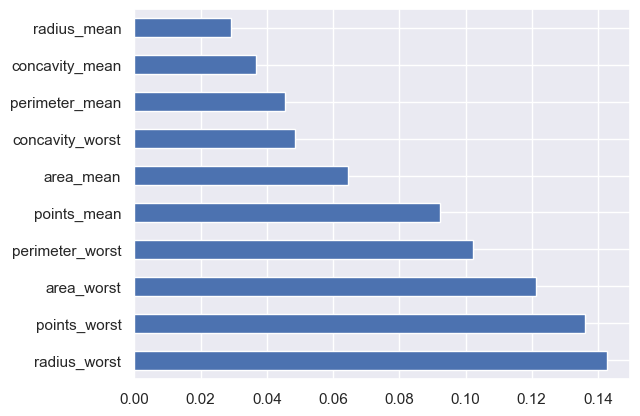

ExtraTrees > feature importances : 
 [0.04371032 0.01834533 0.05846751 0.05015371 0.00778232 0.03887236
 0.04418461 0.08957653 0.00921194 0.00660082 0.02482725 0.00632255
 0.01343332 0.03200467 0.0059722  0.00979797 0.00930359 0.00686405
 0.00646912 0.00753402 0.09425206 0.03119065 0.07598185 0.07799254
 0.01992174 0.02147567 0.04960051 0.11021122 0.01463897 0.01530057]


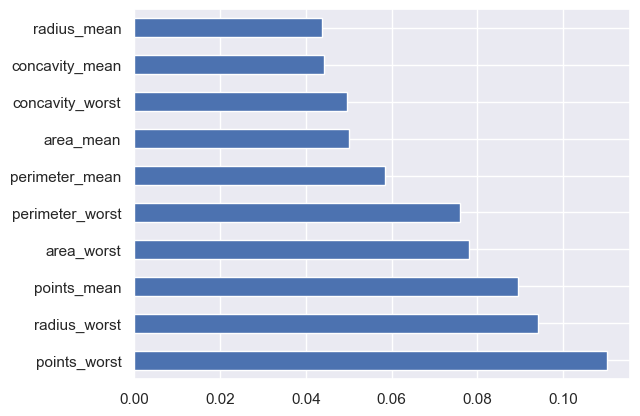

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

model = [DecisionTreeClassifier(),
         RandomForestClassifier(n_estimators=100),
         ExtraTreesClassifier(n_estimators=100)]

model = [model[i].fit(X,y) for i in range(len(model))]

num_chr = [12, 12, 10]
# Use the inbuilt feature_importances_ of tree-based classifiers
# to plot graphs of feature importances for data visualization
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ' > feature importances : \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X.columns)
    feat_importances.nlargest(10).plot.barh()
    # plt.xlim(0, 0.7)
    plt.show()

In [28]:
#  selected features
X_features = X[['radius_worst', 'points_worst', 'area_worst', 'texture_worst',]]
X_features

,radius_worst,points_worst,area_worst,texture_worst
0,25.380,0.2654,2019.0,17.33
1,24.990,0.1860,1956.0,23.41
2,23.570,0.2430,1709.0,25.53
3,14.910,0.2575,567.7,26.50
4,22.540,0.1625,1575.0,16.67
...,...,...,...,...
564,25.450,0.2216,2027.0,26.40
565,23.690,0.1628,1731.0,38.25
566,18.980,0.1418,1124.0,34.12
567,25.740,0.2650,1821.0,39.42


# Normalization

In [29]:
# z-score Standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Xn = standard_scaler.fit_transform(X_features)

In [15]:
#MinMaxScaler 較差
'''
from sklearn.preprocessing import MinMaxScaler #將數據正規化到[0-1]
minmax_scaler = MinMaxScaler()
Xn = minmax_scaler.fit_transform(X_features)
'''

# Training Models for Classification

In [30]:
# Split the dataset with 85% for training data
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(Xn, y, random_state=0,
                                  train_size=0.85, test_size=0.15)

In [31]:
from sklearn.linear_model import LogisticRegression
model = [LogisticRegression(random_state=1),
         DecisionTreeClassifier(random_state=1),
         RandomForestClassifier(n_estimators=200, random_state=1),
         ExtraTreesClassifier(n_estimators=200, random_state=1)]

model = [model[i].fit(X1,y1) for i in range(len(model))]
pred  = [model[i].predict(X2) for i in range(len(model))]

# Accuracy Scores

In [32]:
from sklearn.metrics import accuracy_score
acc = [accuracy_score(y2, pred[i]) for i in range(len(model))]

num_chr = [12, 12, 12, 10]
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \t', acc[i])

LogisticRegr: 	 0.9883720930232558
DecisionTree: 	 0.9767441860465116
RandomForest: 	 0.9767441860465116
ExtraTrees: 	 0.9767441860465116
